# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [120]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [121]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [122]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [123]:
ny = temp[temp["State"] == 'New York']
ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [124]:
ny["Temperature"].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [125]:
above_15 = temp[temp["Temperature"] > 15]

#### Now, return only the cities that have a temperature above 15 degress Celcius

In [126]:
cities_above_15 = temp[temp["Temperature"] > 15][["City"]]
cities_above_15

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [127]:
condition_1 = temp["Temperature"] > 15
condition_2 = temp["Temperature"] < 20
cities = temp[condition_1 & condition_2][["City"]]
cities

,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [128]:
states_mean_std = temp.groupby("State")["Temperature"].agg(["mean", "std"])
states_mean_std

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [129]:
employee = pd.read_csv("employee.csv")

#### Explore the data types of the Temp dataframe. Comment your results

In [130]:
employee.dtypes #There are 2 ints (years and salaries) and the rest are objects, probably different strings

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

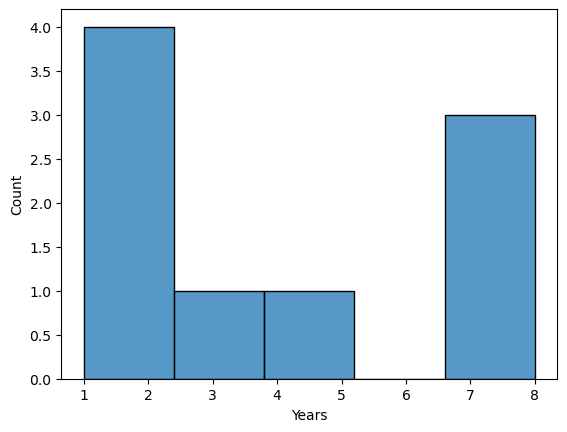

In [131]:
sns.histplot(x=employee.Years);
#Most people has been working between 1 and 2 years in the company
#3 people have been working 7 or 8 years
#The graph displays a 'valley' in the middle, 
    #indicating a lower number of employees who have worked between 2.5 and 6.5 years at the company.

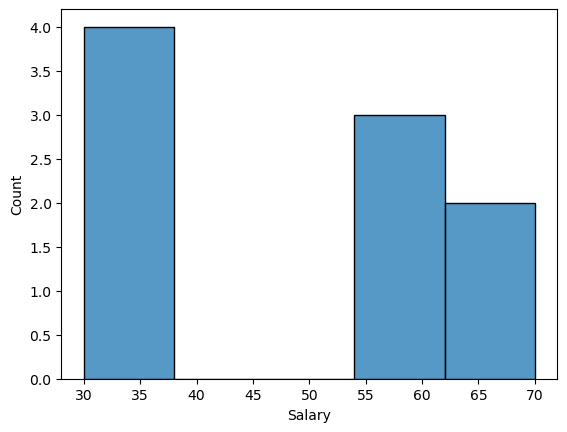

In [132]:
sns.histplot(x=employee.Salary); 
#4 employees make between 30 and 38 and the other ones between 55 and 70.
#There is a gap, no one makes between 38 and 54 

#### What's the average salary in this company?

In [133]:
employee["Salary"].mean()

48.888888888888886

#### What's the highest salary?

In [134]:
employee["Salary"].max()

70

#### What's the lowest salary?

In [135]:
employee["Salary"].min()

30

#### Who are the employees with the lowest salary?

In [136]:
condition = employee["Salary"] == employee["Salary"].max()
highest_salaries = employee[condition][["Name"]]
highest_salaries

,Name
6,Carlos
8,Ana


#### Could you give all the information about an employee called David?

In [137]:
david = employee[employee["Name"] == "David"]
david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [138]:
david[["Salary"]]

,Salary
2,30


#### Print all the rows where job title is associate

In [139]:
associates = employee[employee["Title"] == "associate"]
associates

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [140]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [141]:
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [142]:
condition_1 = employee["Title"] == "associate"
condition_2 = employee["Salary"] > 55
employee[condition_1 & condition_2]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [143]:
employee.groupby("Years")[["Salary"]].agg("mean")

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [144]:
employee.groupby("Title")[["Salary"]].agg("mean")

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

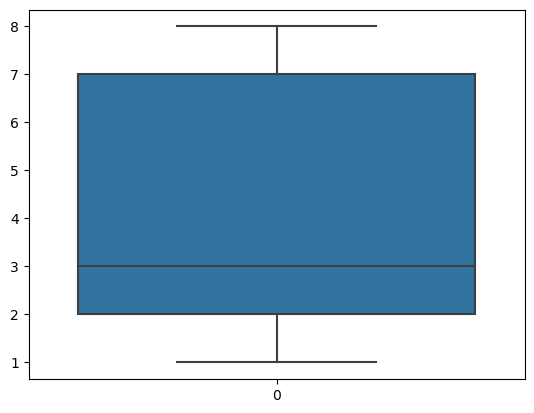

In [145]:
sns.boxplot(employee.Years);

In [146]:
employee["Years"].quantile(0.25)

2.0

In [147]:
employee["Years"].quantile(0.75)

7.0

#### Is the mean salary per gender different?

In [148]:
employee.groupby("Gender")[["Salary"]].agg("mean") #Yes, Males have higher mean salaries

,Salary
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [149]:
employee.groupby("Department").agg({"Years":["min","max","mean"],
                                    "Salary":["min","max","mean"]})

Years               Salary           
             min max      mean    min max   mean
Department                                      
HR             2   8  4.666667     30  70  45.00
IT             1   8  4.500000     30  70  48.75
Sales          2   3  2.500000     55  55  55.00

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [150]:
salary_difference = employee.groupby("Department").agg({"Salary": lambda x: x.max() - x.min()})

salary_difference.rename(columns={"Salary": "Difference"})

,Difference
Department,
HR,40
IT,40
Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [151]:
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [152]:
orders.shape

(397924, 14)

In [153]:
orders.dtypes #most columns are numeric, either ints or float

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [154]:
orders.describe() #Some observations are that the data is all from 2010 and 2011. 
                    # The quantity has a large std so data is quite disperse, similar to the amount spent

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [155]:
orders['amount_spent'].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [156]:
orders['amount_spent'].max()

168469.6

In [157]:
orders['amount_spent'].min()

0.0

#### Select all the customers we have in Spain

In [158]:
spain_customers = orders[orders["Country"] == "Spain"]

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [159]:
spain_customers["CustomerID"].count()

2485

#### Select all the customers who have bought more than 50 items ?

In [160]:
more_than_50 = orders[orders["Quantity"] >= 50]

#### Select orders from Spain that are above 50 items

In [161]:
condition_1 = orders["Country"] == "Spain"
condition_2 = orders["Quantity"] >= 50
Spain_50 = orders[condition_1 & condition_2]

#### Select all free orders

In [162]:
free = orders[orders["amount_spent"] == 0]

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [163]:
lunch_bag = orders[orders["Description"].str.contains("lunch bag")]

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [164]:
condition_1 = orders["Description"].str.contains("lunch bag")
condition_2 = orders["year"] == 2011
lunch_bags_2011 = orders[condition_1 & condition_2]

#### Show the frequency distribution of the amount spent in Spain.

<Axes: xlabel='amount_spent', ylabel='Count'>

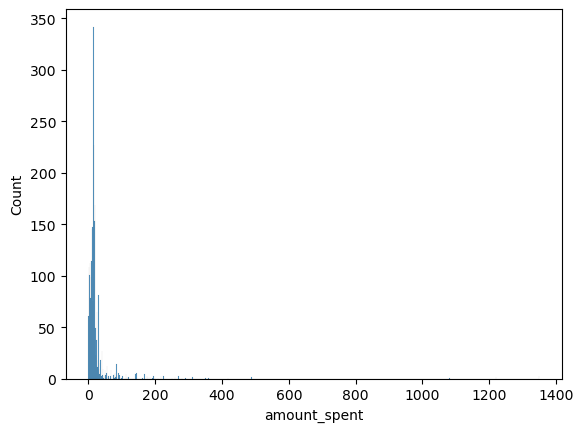

In [177]:
spain = orders[orders["Country"] == "Spain"]
sns.histplot(spain["amount_spent"])

#### Select all orders made in the month of August

In [166]:
august_orders = orders[orders["month"] == 8]

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [167]:
orders_august_country = orders[orders["month"] == 8]["Country"].value_counts()

#### What's the  average amount of money spent by country

In [168]:
avg_amount_country = orders.groupby("Country").agg({"amount_spent":["mean"]})

#### What's the most expensive item?

In [169]:
expensive_item = orders[orders["UnitPrice"] == orders["UnitPrice"].max()]

#### What was the average amount spent per year ?

In [170]:
avg_amount_year = orders.groupby("year").agg({"amount_spent":["mean"]})